In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
data =pd.read_csv(r'E:\MLBS\Assignment 2\data_train.csv')
test_data =pd.read_csv(r'E:\MLBS\Assignment 2\data_test.csv')
labels = pd.read_csv(r'E:\MLBS\Assignment 2\Copy of actual.csv', index_col = 'patient')

In [3]:
print("First 5 rows of the training dataset:")
# print(data.head())
data.head()

First 5 rows of the training dataset:


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
print("First few rows of the testing dataset:")
#print(test_data.head())
test_data.head()

First few rows of the testing dataset:


,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [5]:
print("\nTraining Dataset information:")
print(data.info())


Training Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   in

In [6]:
print("\nTesting Dataset information:")
print(test_data.info())


Testing Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   39                     7129 non-null   int64 
 3   call                   7129 non-null   object
 4   40                     7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   42                     7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   47                     7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  48                     7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  49                     7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  41                     7129 non-null   int

In [7]:
print("\nSummary statistics of numerical columns of Training Data:")
print(data.describe())


Summary statistics of numerical columns of Training Data:
                  1             2             3             4             5  \
count   7129.000000   7129.000000   7129.000000   7129.000000   7129.000000   
mean     641.367092    690.246318    698.307897    600.985271    679.532894   
std     2264.294361   2468.814372   2485.656277   2340.047428   2375.895416   
min   -19826.000000 -17930.000000 -27182.000000 -23396.000000 -10339.000000   
25%      -21.000000    -14.000000    -31.000000    -33.000000      8.000000   
50%      159.000000    130.000000    177.000000    139.000000    146.000000   
75%      535.000000    488.000000    610.000000    497.000000    471.000000   
max    31086.000000  29288.000000  28056.000000  31449.000000  29543.000000   

                  6             7             8             9            10  \
count   7129.000000   7129.000000   7129.000000   7129.000000   7129.000000   
mean     564.797728    584.437649    571.359097    789.713705    599.48

In [8]:
print("\nSummary statistics of numerical columns of Testing Data:")
print(test_data.describe())


Summary statistics of numerical columns of Testing Data:
                 39            40            42            47            48  \
count   7129.000000   7129.000000   7129.000000   7129.000000   7129.000000   
mean     582.194978    527.819329    603.813719    576.027213    751.464862   
std     2473.986881   2304.800191   2377.775459   2436.848381   2437.815002   
min   -21984.000000 -21296.000000 -10481.000000  -7861.000000 -16945.000000   
25%      -33.000000    -36.000000    -17.000000     -8.000000     -6.000000   
50%      125.000000    124.000000    116.000000    126.000000    158.000000   
75%      439.000000    424.000000    420.000000    374.000000    577.000000   
max    45815.000000  29136.000000  37529.000000  43221.000000  25231.000000   

                 49            41            43            44            45  \
count   7129.000000   7129.000000   7129.000000   7129.000000   7129.000000   
mean     601.516763    565.152476    563.614252    531.401599    530.194

In [9]:
print("\nTraining Dataset Description:")
print("The dataset contains information about cancer types.")
print("Columns in the dataset:", data.columns)


Training Dataset Description:
The dataset contains information about cancer types.
Columns in the dataset: Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')


In [10]:
print("\nTesting Dataset Description:")
print("The dataset contains information about cancer types.")
print("Columns in the dataset:", test_data.columns)


Testing Dataset Description:
The dataset contains information about cancer types.
Columns in the dataset: Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46', 'call.10', '70', 'call.11', '71', 'call.12', '72',
       'call.13', '68', 'call.14', '69', 'call.15', '67', 'call.16', '55',
       'call.17', '56', 'call.18', '59', 'call.19', '52', 'call.20', '53',
       'call.21', '51', 'call.22', '50', 'call.23', '54', 'call.24', '57',
       'call.25', '58', 'call.26', '60', 'call.27', '61', 'call.28', '65',
       'call.29', '66', 'call.30', '63', 'call.31', '64', 'call.32', '62',
       'call.33'],
      dtype='object')


In [11]:
#check for nulls
print(data.isna().sum().max())
print(test_data.isna().sum().max())

0
0


In [12]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Gene Description         0
Gene Accession Number    0
1                        0
call                     0
2                        0
                        ..
call.35                  0
32                       0
call.36                  0
33                       0
call.37                  0
Length: 78, dtype: int64


In [13]:
print("\nMissing values:")
print(test_data.isnull().sum())


Missing values:
Gene Description         0
Gene Accession Number    0
39                       0
call                     0
40                       0
                        ..
call.31                  0
64                       0
call.32                  0
62                       0
call.33                  0
Length: 70, dtype: int64


In [14]:
#drop 'call' columns
cols = [col for col in data.columns if 'call' in col]
train = data.drop(columns=cols)
cols = [col for col in test_data.columns if 'call' in col]
test = test_data.drop(columns=cols)

In [15]:
#Join all the data
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [16]:
#transpose rows and columns
df_all = df_all.T

In [17]:
#Encoding Categorical Features

df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)
# add the cancer column to train data

Final_Data = pd.merge(df_all, labels, on="patient")

In [18]:
Final_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [19]:
Final_Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

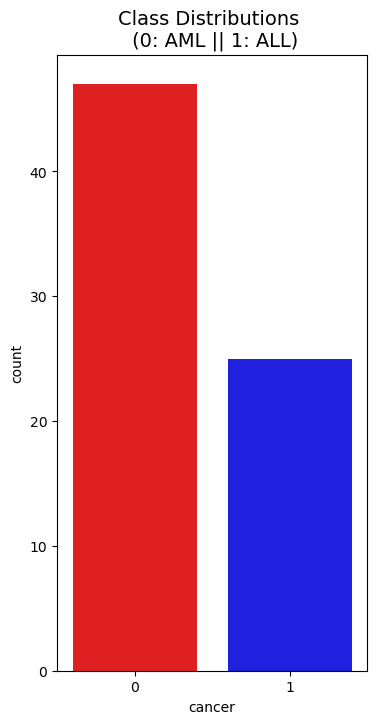

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
colors = ["#FF0000", "#0000FF"]  # Red for AML and Blue for ALL

sns.countplot(x='cancer', data=Final_Data, palette=colors)
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)
plt.show()


In [21]:
X = Final_Data.drop('cancer', axis=1)  # Features
y = Final_Data['cancer']  # Target

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,68
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,69
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,70
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,71


In [23]:
y

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: cancer, Length: 72, dtype: uint8

In [24]:
# Split the dataset
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

<Axes: ylabel='Density'>

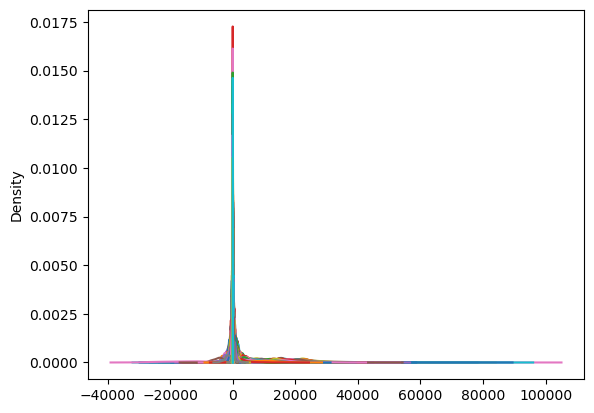

In [25]:
#before feature scaling
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)

In [26]:
from sklearn.preprocessing import StandardScaler

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Display the shape
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (54, 7130)
Shape of y_train: (54,)
Shape of X_test: (18, 7130)
Shape of y_test: (18,)


<Axes: ylabel='Density'>

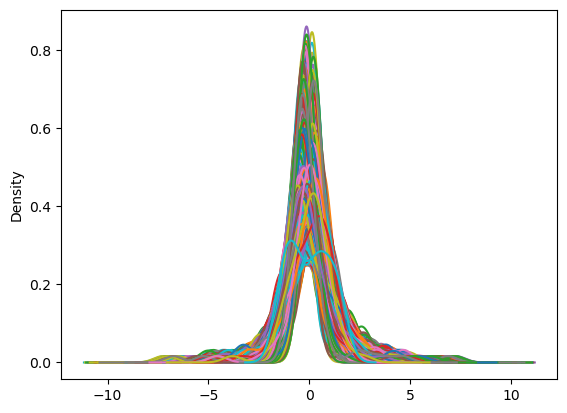

In [28]:
#after feature scaling
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.plot(kind="kde", legend=None)

38 features explain around 90% of the variance. From 7129 features to 38, not too bad.


<BarContainer object of 38 artists>

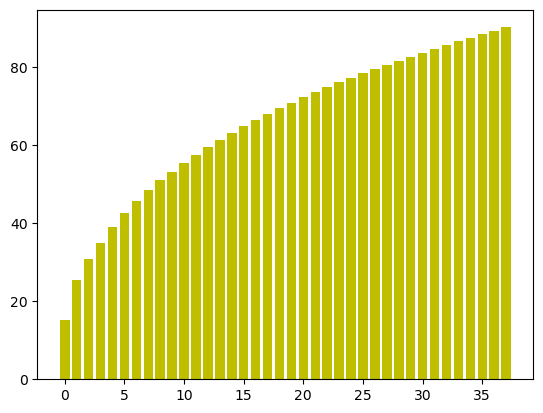

In [29]:
# Dimentionality reduction using Principal Component Analysis(PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train_scaled)

total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp,color = 'y')

In [30]:
pca.n_components_ 

38

In [31]:
print(type(X_train_pca))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [32]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.1


In [34]:
pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import imblearn
print("imbalanced-learn version:", imblearn.__version__)


imbalanced-learn version: 0.11.0


In [36]:
from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca,y_train)

print("After Upsampling:-")
print(Counter(y_train_ov))

Before Upsampling:-
Counter({0: 39, 1: 15})
After Upsampling:-
Counter({0: 39, 1: 39})


In [37]:
# data types of y_train and y_test
print("Data type of y_train:", y_train.dtype)
print("Data type of y_test:", y_test.dtype)

Data type of y_train: uint8
Data type of y_test: uint8


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_ov, y_train_ov)
svm_linear_predictions = svm_linear.predict(X_test_pca)
svm_linear_accuracy = accuracy_score(y_test, svm_linear_predictions)
print("SVM Linear Kernel Accuracy:", svm_linear_accuracy)
svm_linear_mse = mean_squared_error(y_test, svm_linear_predictions)
print("Mean Squared Error for SVM Linear Kernel:", svm_linear_mse)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_ov, y_train_ov)
svm_poly_predictions = svm_poly.predict(X_test_pca)
svm_poly_accuracy = accuracy_score(y_test, svm_poly_predictions)
print("\nSVM Polynomial Kernel Accuracy:", svm_poly_accuracy)
svm_poly_mse = mean_squared_error(y_test, svm_poly_predictions)
print("Mean Squared Error for SVM Polynomial Kernel:", svm_poly_mse)


# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_ov, y_train_ov)
svm_rbf_predictions = svm_rbf.predict(X_test_pca)
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_predictions)
print("\nSVM RBF Kernel Accuracy:", svm_rbf_accuracy)
svm_rbf_mse = mean_squared_error(y_test, svm_rbf_predictions)
print("Mean Squared Error for SVM RBF Kernel:", svm_rbf_mse)


# Calculating F1-score, precision, recall, and confusion matrix for SVM
svm_f1 = f1_score(y_test, svm_rbf_predictions, average='weighted', zero_division=1)
svm_precision = precision_score(y_test, svm_rbf_predictions, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_rbf_predictions, average='weighted')
svm_confusion_matrix = confusion_matrix(y_test, svm_rbf_predictions)
svm_classification_report = classification_report(y_test, svm_rbf_predictions, zero_division=1)

print("\nSVM F1-score:", svm_f1)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)
print("SVM Classification Report:\n", svm_classification_report)

SVM Linear Kernel Accuracy: 0.6666666666666666
Mean Squared Error for SVM Linear Kernel: 0.3333333333333333

SVM Polynomial Kernel Accuracy: 0.4444444444444444
Mean Squared Error for SVM Polynomial Kernel: 0.5555555555555556

SVM RBF Kernel Accuracy: 0.7777777777777778
Mean Squared Error for SVM RBF Kernel: 0.2222222222222222

SVM F1-score: 0.7722222222222221
SVM Precision: 0.8518518518518517
SVM Recall: 0.7777777777777778
SVM Confusion Matrix:
 [[8 0]
 [4 6]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.60      0.75        10

    accuracy                           0.78        18
   macro avg       0.83      0.80      0.77        18
weighted avg       0.85      0.78      0.77        18



In [43]:
# Random Forest model
rf_model = RandomForestClassifier(bootstrap=False, max_features=0.6, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=70)
rf_model.fit(X_train_ov, y_train_ov)
rf_model_predictions = rf_model.predict(X_test_pca)

# Reshape predictions to a 2D array with a single column
rf_model_predictions = rf_model_predictions.reshape(-1, 1)
rf_accuracy = accuracy_score(y_test, rf_model_predictions)
print("Random Forest Accuracy:", rf_accuracy)
rf_mse = mean_squared_error(y_test, rf_model_predictions)
print("Mean Squared Error for Random Forest:", rf_mse)

rf_f1 = f1_score(y_test, rf_model_predictions, average='weighted', zero_division=1)
rf_precision = precision_score(y_test, rf_model_predictions, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_model_predictions, average='weighted')
rf_confusion_matrix = confusion_matrix(y_test, rf_model_predictions)
rf_classification_report = classification_report(y_test, rf_model_predictions, zero_division=1)

print("\nRandom Forest F1-score:", rf_f1)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.7222222222222222
Mean Squared Error for Random Forest: 0.2777777777777778

Random Forest F1-score: 0.7089947089947091
Random Forest Precision: 0.8290598290598291
Random Forest Recall: 0.7222222222222222
Random Forest Confusion Matrix:
 [[8 0]
 [5 5]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for hyperparameter search
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Creating the GridSearchCV object
mlp_search = GridSearchCV(estimator=MLPRegressor(random_state=42), param_grid=mlp_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mlp_search.fit(X_train_ov, y_train_ov)

# Get the best model and print the best parameters

best_mlp = mlp_search.best_estimator_
best_parameters_mlp = mlp_search.best_params_
print("Best MLP Regressor parameters:", best_parameters_mlp)

# Evaluate the best model
mlp_predictions = best_mlp.predict(X_test_pca)
mse = mean_squared_error(y_test, mlp_predictions)
print("Mean Squared Error:", mse)

# Best negative MSE (best score)
best_negative_mse = mlp_search.best_score_
print("Best Negative MSE (best score):", best_negative_mse)

Best MLP Regressor parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
Mean Squared Error: 0.16397561026565177
Best Negative MSE (best score): -0.2994309822922902


In [45]:
print(X_test_pca.shape) 

(18, 38)


In [46]:
# Neural network regression
nn_model = MLPRegressor(hidden_layer_sizes=best_parameters_mlp['hidden_layer_sizes'], activation=best_parameters_mlp['activation'], alpha=best_parameters_mlp['alpha'], random_state=42)
nn_model.fit(X_train_ov, y_train_ov)
nn_predictions = nn_model.predict(X_test_pca)

# Calculate Mean Squared Error (MSE)
nn_mse = mean_squared_error(y_test, nn_predictions)

# Calculate R-squared
r_squared = nn_model.score(X_test_pca, y_test)

print("Mean Squared Error for Neural Network Regression:", nn_mse)
print("R-squared:", r_squared)

# nn_f1 = f1_score(y_test, nn_predictions, average='weighted')
# nn_precision = precision_score(y_test, nn_predictions, average='weighted')
# nn_recall = recall_score(y_test, nn_predictions, average='weighted')
# nn_confusion_matrix = confusion_matrix(y_test, nn_predictions)
# nn_classification_report = classification_report(y_test, nn_predictions)

# print("\nNeural Network F1-score:", nn_f1)
# print("Neural Network Precision:", nn_precision)
# print("Neural Network Recall:", nn_recall)
# print("Neural Network Confusion Matrix:\n", nn_confusion_matrix)
# print("Neural Network Classification Report:\n", nn_classification_report)



Mean Squared Error for Neural Network Regression: 0.16397561026565177
R-squared: 0.3358987784241103


In [47]:
# Dictionary to hold MSE values for each model
mse_values = {'SVM': svm_rbf_mse, 'Random Forest': rf_mse, 'Neural Network': nn_mse}

# Finding the model with the lowest MSE
best_model = min(mse_values, key=mse_values.get)

# Print the MSE for each model
print("Mean Squared Error (SVM):", svm_rbf_mse)
print("Mean Squared Error (Random Forest):", rf_mse)
print("Mean Squared Error (Neural Network):", nn_mse)

# Print the most suitable model based on the lowest MSE
print("The most suitable model based on MSE is:", best_model)

Mean Squared Error (SVM): 0.2222222222222222
Mean Squared Error (Random Forest): 0.2777777777777778
Mean Squared Error (Neural Network): 0.16397561026565177
The most suitable model based on MSE is: Neural Network


In [48]:
# Discuss strengths and weaknesses
if svm_rbf_mse < nn_mse:
    print("\nSVM has a slightly lower MSE, indicating good predictive performance.")
    print("Strengths of SVM: Effective in high-dimensional spaces, versatility with the kernel trick.")
    print("Weaknesses of SVM: Sensitivity to parameter choice, computationally intensive training.")
else:
    print("\nNeural Network has a slightly lower MSE, indicating good predictive performance.")
    print("Strengths of Neural Network: Ability to model complex relationships, adaptability to diverse data types.")
    print("Weaknesses of Neural Network: Potential for overfitting, computationally intensive training.")


Neural Network has a slightly lower MSE, indicating good predictive performance.
Strengths of Neural Network: Ability to model complex relationships, adaptability to diverse data types.
Weaknesses of Neural Network: Potential for overfitting, computationally intensive training.


In [49]:
# Discuss strengths and weaknesses based on MSE
print("\nStrengths and Weaknesses based on Mean Squared Error:")
print("- SVM:")
print("  - Strengths:")
print("    - The MSE for SVM is relatively low, indicating good predictive performance.")
print("    - Effective in high-dimensional spaces and versatile due to the kernel trick.")
print("  - Weaknesses:")
print("    - Training SVMs can be time-consuming, especially for large datasets.")
print("    - Sensitivity to the choice of parameters, particularly the kernel.")

print("\n- Neural Network:")
print("  - Strengths:")
print("    - The MSE for the Neural Network is competitive, suggesting good predictive performance.")
print("    - Neural networks can model complex relationships in the data.")
print("  - Weaknesses:")
print("    - Neural networks can be prone to overfitting, especially with complex architectures.")
print("    - Training can be computationally intensive, particularly for deep networks.")



Strengths and Weaknesses based on Mean Squared Error:
- SVM:
  - Strengths:
    - The MSE for SVM is relatively low, indicating good predictive performance.
    - Effective in high-dimensional spaces and versatile due to the kernel trick.
  - Weaknesses:
    - Training SVMs can be time-consuming, especially for large datasets.
    - Sensitivity to the choice of parameters, particularly the kernel.

- Neural Network:
  - Strengths:
    - The MSE for the Neural Network is competitive, suggesting good predictive performance.
    - Neural networks can model complex relationships in the data.
  - Weaknesses:
    - Neural networks can be prone to overfitting, especially with complex architectures.
    - Training can be computationally intensive, particularly for deep networks.


In [50]:
# Discuss the most suitable model based on MSE comparison
print("\nChoosing the Most Suitable Model:")
print("- Both SVM and Neural Network demonstrate competitive performance based on MSE.")
print("- Given the closeness in MSE and considering additional factors like interpretability and ease of use:")
print("  - If interpretability is crucial: SVM might be more suitable due to its simpler model structure and easier parameter interpretation.")
print("  - If computational efficiency and scalability are important: SVM might be preferred for moderately sized datasets, as it generally requires less training time compared to neural networks.")
print("  - If the potential for complex relationships in the data is a priority: Neural Network could be a better fit due to its ability to model intricate patterns and relationships in the data.")
print("The final choice of the most suitable model should consider a balance between accuracy, interpretability, computational efficiency, and the specific requirements of the cancer type prediction task. It's often valuable to experiment with both models, fine-tuning hyperparameters, and assessing their performance on the specific dataset.")


Choosing the Most Suitable Model:
- Both SVM and Neural Network demonstrate competitive performance based on MSE.
- Given the closeness in MSE and considering additional factors like interpretability and ease of use:
  - If interpretability is crucial: SVM might be more suitable due to its simpler model structure and easier parameter interpretation.
  - If computational efficiency and scalability are important: SVM might be preferred for moderately sized datasets, as it generally requires less training time compared to neural networks.
  - If the potential for complex relationships in the data is a priority: Neural Network could be a better fit due to its ability to model intricate patterns and relationships in the data.
The final choice of the most suitable model should consider a balance between accuracy, interpretability, computational efficiency, and the specific requirements of the cancer type prediction task. It's often valuable to experiment with both models, fine-tuning hyperp

In [51]:
# # Compare model performances based on accuracy
# # Higher accuracy or F1-score indicates a better-performing model

# model_accuracies = {
#     'SVM': svm_rbf_accuracy,
#     'Random Forest': rf_accuracy,
# #     'Neural Network': nn_accuracy
# }

# best_model = max(model_accuracies, key=model_accuracies.get)
# print("Best Model:", best_model)


In [52]:
# # Analyze and conclude based on the comparison

# # Print model comparison summary
# print("Model Comparison Summary:")
# for model, accuracy in model_accuracies.items():
#     print(f"{model} Accuracy: {accuracy}")

# print("Best Model:", best_model)
# print("Conclusion: Based on the comparison, the best model for this task is", best_model)
